In [20]:
import pandas as pd
import numpy as np
import sys
import os
import importlib

sys.path.append(os.path.abspath(".."))

import src.utils.eda as eda
import src.pipeline.pr_v1 as pr1
import src.pipeline.fe_v1 as fe1
import src.pipeline.fe_v2 as fe2
import src.pipeline.fe_v3 as fe3
import src.pipeline.fe_v4 as fe4
import src.pipeline.fe_v5 as fe5

In [21]:
# 前処理データの読み込み
train_data = pd.read_csv("../artifacts/prepro/train_data1.csv")
test_data = pd.read_csv("../artifacts/prepro/test_data1.csv")

In [7]:
# 特徴量エンジニアリングなし
tr_df, test_df = fe1.feature_engineering(train_data, test_data)

tr_df.to_csv("../artifacts/features/tr_df1.csv", index=False)
test_df.to_csv("../artifacts/features/test_df1.csv", index=False)

In [17]:
# logreg用
importlib.reload(fe2)
tr_df, test_df = fe2.feature_engineering(train_data, test_data)

tr_df.to_csv("../artifacts/features/tr_df2.csv", index=False)
test_df.to_csv("../artifacts/features/test_df2.csv", index=False)

In [17]:
# logreg用 + 特徴用エンジニアリング追加
importlib.reload(fe3)
tr_df, test_df = fe3.feature_engineering(train_data, test_data)

tr_df.to_csv("../artifacts/features/tr_df3.csv", index=False)
test_df.to_csv("../artifacts/features/test_df3.csv", index=False)

In [18]:
# tr_df3 + 3ペア交互作用
importlib.reload(fe4)
tr_df, test_df = fe4.feature_engineering(train_data, test_data)

tr_df.to_csv("../artifacts/features/tr_df4.csv", index=False)
test_df.to_csv("../artifacts/features/test_df4.csv", index=False)

In [22]:
# tr_df4 + 2値分類に変換
importlib.reload(fe5)
tr_df, test_df = fe5.feature_engineering(train_data, test_data)

tr_df.to_csv("../artifacts/features/tr_df5.csv", index=False)
test_df.to_csv("../artifacts/features/test_df5.csv", index=False)

In [23]:
tr_df["target"].unique()

array([0, 1])

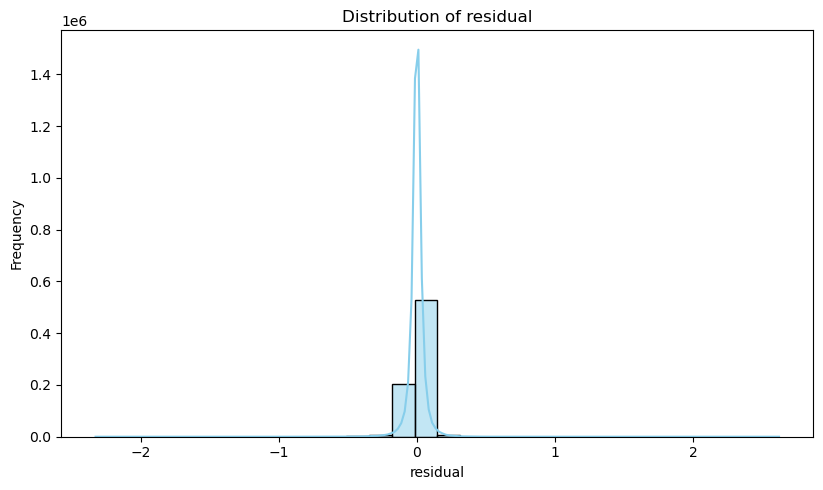

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
residual,750000.0,0.000005,0.059894,-2.325483,-0.177858,-0.076143,-0.048175,-0.019857,0.000865,0.021463,0.048997,0.075144,0.161628,2.622677


In [8]:
# 残差の分布を確認
importlib.reload(eda)
oof = np.load("../artifacts/oof/single/oof_single_2.npy")
residual = train_data["target"].values - oof

residual_df = pd.DataFrame(residual, columns=["residual"])

eda.plot_numerical_distribution(residual_df)